# Figures for n=2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *
from matplotlib.lines import Line2D

### Here we observe $\lambda$ evolution for n=2 (exponential) and for n=1 (linear)

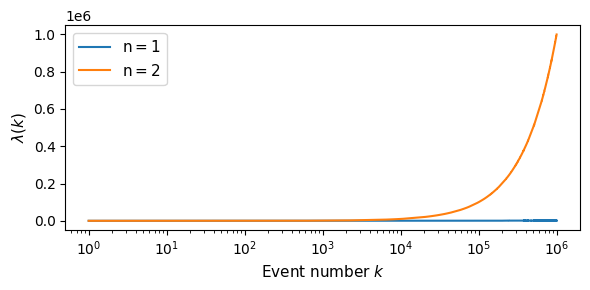

In [17]:
K = 10**6
k = np.arange(1, K+2)
mu = 1.0
plt.figure(figsize=(6,3))
for n in np.arange(1,3):
    times, rate = generate_series(K, n, mu)
    plt.plot(k, rate, label=f'n$={n}$')
plt.legend(fontsize = 11)
plt.xscale('log')
# plt.yscale('log')
# plt.yticks([20000, 40000, 60000, 80000, 100000], ['$2\cdot 10^4$', '$4\cdot 10^4$', '$6\cdot 10^4$', '$8\cdot 10^4$', '$10^5$'])
plt.xlabel('Event number $k$', fontsize = 11)
plt.ylabel('$\lambda (k)$', fontsize = 11)
plt.tight_layout()

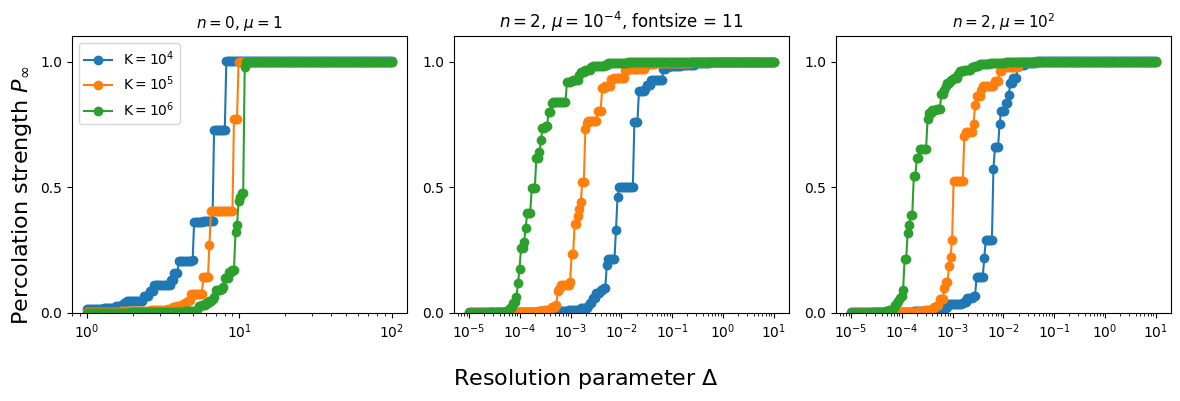

In [26]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)
K = 10**6
mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]
labels = ['K$=10^4$','K$=10^5$','K$=10^6$','K$=10^7$','K$=10^8$']
deltas = [np.logspace(0, 2, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10), np.logspace(-5, 1, num = 200, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3)
        times_between_events, _, _ = generate_series(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.plot(delta, percolation_strength, marker='o')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$', fontsize = 11)
fig.axes[1].set_title('$n=2$, $\mu=10^{-4}$, fontsize = 11')
fig.axes[2].set_title('$n=2$, $\mu=10_^{2}$', fontsize = 11)
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

# Figures for $R=10^3$

KeyboardInterrupt: 

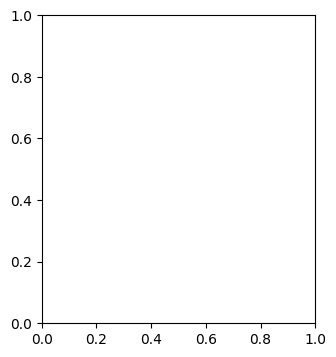

In [27]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**3

mus = [1, 10**-4, 10**2]
ns = [0, 2, 2]

labels = ['$K=10^3$','$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10)]
#np.save ('./data/deltas', deltas)

for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            times_between_events, _, _ = generate_series(K, n, mu)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)
        
        percolation_means = np.mean(percolations, axis=0)
        #np.save(f'./data/percolation_means_{n}_{mu}_{K}', percolation_means)
        ax.plot(delta, percolation_means, marker='o', markersize=5)
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=2$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=2$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

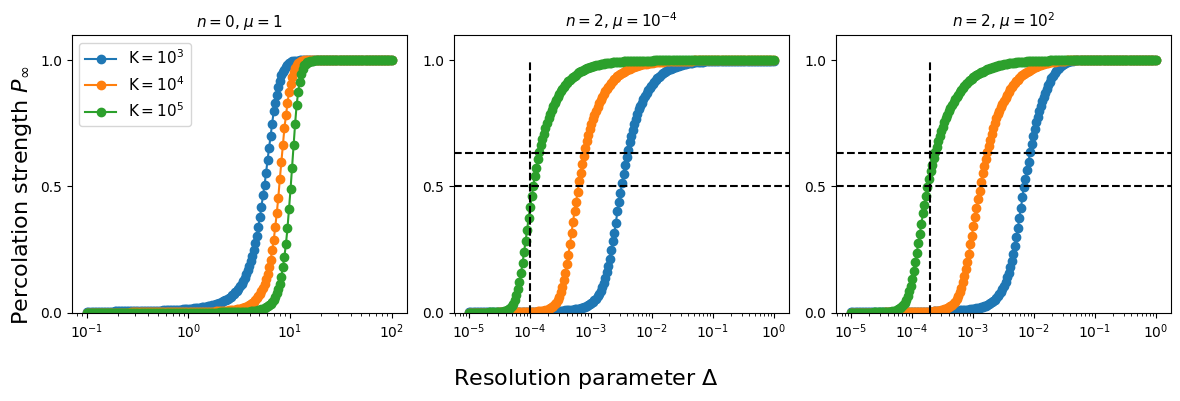

In [14]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

deltas = [np.logspace(-1, 2, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10)]

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(deltas[0], np.load(f'./data/percolation_means_0_1_{10**3}.npy'), marker = 'o', label='K$=10^3$')
ax0.plot(deltas[0], np.load(f'./data/percolation_means_0_1_{10**4}.npy'), marker = 'o', label='K$=10^4$')
ax0.plot(deltas[0], np.load(f'./data/percolation_means_0_1_{10**5}.npy'), marker = 'o', label='K$=10^5$')
ax0.set_xscale('log')
ax0.set_ylim(0, 1.1)
ax0.set_yticks([0, 0.5, 1])
ax0.set_title('$n=0$, $\mu=1$', fontsize = 11)
ax0.legend(fontsize = 11)

ax1 = fig.add_subplot(axgrid[0, 1])
ax1.plot(deltas[1], np.load(f'./data/percolation_means_2_0.0001_{10**3}.npy'), marker = 'o', label='$K=10^3$')
ax1.plot(deltas[1], np.load(f'./data/percolation_means_2_0.0001_{10**4}.npy'), marker = 'o', label='$K=10^4$')
ax1.plot(deltas[1], np.load(f'./data/percolation_means_2_0.0001_{10**5}.npy'), marker = 'o', label='$K=10^5$')
ax1.set_xscale('log')
ax1.set_ylim(0, 1.1)
ax1.set_yticks([0, 0.5, 1])
ax1.set_title('$n=2$, $\mu=10^{-4}$', fontsize = 11)

ax2 = fig.add_subplot(axgrid[0, 2])
ax2.plot(deltas[2], np.load(f'./data/percolation_means_2_100_{10**3}.npy'), marker = 'o', label='$K=10^3$')
ax2.plot(deltas[2], np.load(f'./data/percolation_means_2_100_{10**4}.npy'), marker = 'o', label='$K=10^4$')
ax2.plot(deltas[2], np.load(f'./data/percolation_means_2_100_{10**5}.npy'), marker = 'o', label='$K=10^5$')
ax2.set_xscale('log')
ax2.set_ylim(0, 1.1)
ax2.set_yticks([0, 0.5, 1])
ax2.set_title('$n=2$, $\mu=10^{2}$', fontsize = 11)

ax1.axhline(y = 1-1/np.e, color='black', linestyle='--')
ax1.axhline(y = 1-1/2, color='black', linestyle='--')
ax1.vlines(x = 10**-4, ymin = 0, ymax = 1, color='black', linestyle='--')

ax2.axhline(y = 1-1/np.e, color='black', linestyle='--')
ax2.axhline(y = 1-1/2, color='black', linestyle='--')
ax2.vlines(x = 2*10**-4, ymin = 0, ymax = 1, color='black', linestyle='--')

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)


fig.tight_layout()


# $\chi$

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

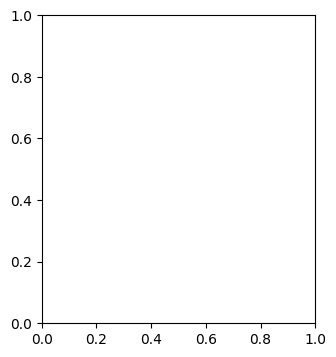

In [4]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

deltas = [np.logspace(-1, 2, num = 100, base = 10), np.logspace(-6, 2, num = 100, base = 10), np.logspace(-5, 0, num = 100, base = 10)]

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(deltas[0], np.load(f'./data/percolation_susceptibility_n=2_mu=1_K={10**3},R=1000.npy'), marker = 'o', label='K$=10^3$')
ax0.plot(deltas[0], np.load(f'./data/percolation_susceptibility_n=2_mu=1_K={10**4},R=1000.npy'), marker = 'o', label='K$=10^4$')
ax0.plot(deltas[0], np.load(f'./data/percolation_susceptibility_n=2_mu=1_K={10**5},R=1000.npy'), marker = 'o', label='K$=10^5$')
ax0.set_xscale('log')
ax0.set_title('$n=0$, $\mu=1$', fontsize = 11)
ax0.legend(fontsize = 11)

ax1 = fig.add_subplot(axgrid[0, 1])
ax1.plot(deltas[1], np.load(f'./data/percolation_susceptibility_n=2_mu=0.0001_K={10**3},R=1000.npy'), marker = 'o', label='$K=10^3$')
ax1.plot(deltas[1], np.load(f'./data/percolation_susceptibility_n=2_mu=0.0001_K={10**4},R=1000.npy.npy'), marker = 'o', label='$K=10^4$')
ax1.plot(deltas[1], np.load(f'./data/percolation_susceptibility_n=2_mu=0.0001_K={10**5},R=1000.npy.npy'), marker = 'o', label='$K=10^5$')
ax1.set_xscale('log')
ax1.set_title('$n=2$, $\mu=10^{-4}$', fontsize = 11)

ax2 = fig.add_subplot(axgrid[0, 2])
ax2.plot(deltas[2], np.load(f'./data/percolation_susceptibility_n=2_mu=100_K={10**3},R=1000.npy.npy'), marker = 'o', label='$K=10^3$')
ax2.plot(deltas[2], np.load(f'./data/percolation_susceptibility_n=2_mu=100_K={10**4},R=1000.npy.npy'), marker = 'o', label='$K=10^4$')
ax2.plot(deltas[2], np.load(f'./data/percolation_susceptibility_n=2_mu=100_K={10**5},R=1000.npy.npy'), marker = 'o', label='$K=10^5$')
ax2.set_xscale('log')
ax2.set_title('$n=2$, $\mu=10^{2}$', fontsize = 11)

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.supylabel('Susceptibility $\chi$', fontsize=16)


fig.tight_layout()


# Stats

In [2]:
clusters_sizes_mu1 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R=1000_mu=1.0E-04.npy') for delta in [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02]]
clusters_sizes_mu2 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R=1000_mu=1.0E+02.npy') for delta in [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02]]
clusters_times_mu1 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R=1000_mu=1.0E-04.npy') for delta in [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02]]
clusters_times_mu2 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R=1000_mu=1.0E+02.npy') for delta in [1.0E-06, 1.0E-05, 1.0E-04, 1.0E-03, 1.0E-02]]

In [8]:
sbins = [np.logspace(0, 3, num = 40, base = 10), 
         np.logspace(0, 4, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10), 
         np.logspace(0, 5, num = 40, base = 10)]
tbins = [np.logspace(-5, 1, num = 40, base = 10), 
         np.logspace(-7, 1, num = 40, base = 10), 
         np.logspace(-8, 1, num = 40, base = 10), 
         np.logspace(-8, 1, num = 40, base = 10),
         np.logspace(-8, 1, num = 40, base = 10)]


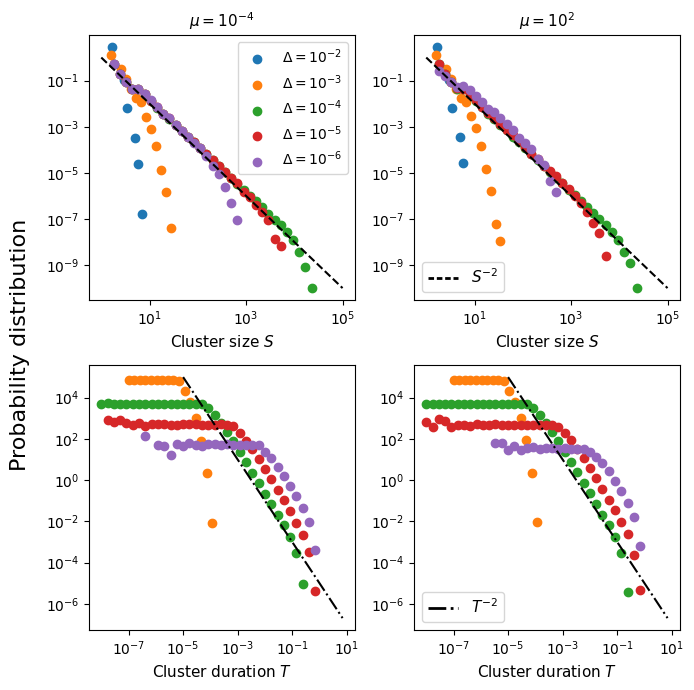

In [9]:
shist_mu1 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu1)]
shist_mu2 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu2)]
thist_mu1 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu1)]
thist_mu2 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu2)]

labels = ['10^{-2}', '10^{-3}', '10^{-4}', '10^{-5}', '10^{-6}']
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

fig.axes[0].set_title('$\mu=10^{-4}$', fontsize = 11)
fig.axes[1].set_title('$\mu=10^{2}$', fontsize = 11)


for i in range(5):
    fig.axes[0].scatter(sbins[i][:-1], shist_mu1[i], label=f'$\Delta={labels[i]}$', marker = 'o') 
    fig.axes[1].scatter(sbins[i][:-1], shist_mu2[i], label=f'$\Delta={labels[i]}$', marker = 'o')
    fig.axes[2].scatter(tbins[i][:-1], thist_mu1[i], label=f'$\Delta={labels[i]}$', marker = 'o')
    fig.axes[3].scatter(tbins[i][:-1], thist_mu2[i], label=f'$\Delta={labels[i]}$', marker = 'o')

for i in range(4):
    fig.axes[i].set_xscale('log')
    fig.axes[i].set_yscale('log')

fig.supylabel('Probability distribution', fontsize=16)
fig.axes[0].set_xlabel('Cluster size $S$', fontsize = 11)
fig.axes[1].set_xlabel('Cluster size $S$', fontsize = 11)
fig.axes[2].set_xlabel('Cluster duration $T$', fontsize = 11)
fig.axes[3].set_xlabel('Cluster duration $T$', fontsize = 11)
fig.axes[0].legend()

s_bins = np.logspace(0, 5, num = 100, base = 10)
y_s = s_bins**(-2)
y_t = tbins[0][:-1]**(-2) * 10**-5

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[2].plot(tbins[0][:-1], y_t, color='black', linestyle='-.')
fig.axes[3].plot(tbins[0][:-1], y_t, color='black', linestyle='-.')


fig.axes[3].legend(handles = [Line2D([0], [0],  color='black', linewidth=2, linestyle='-.')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 11)
fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2,1,2,1], color='black', linewidth=2, linestyle='-.')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 11)

fig.tight_layout()


## Prueba cluster_size*delta

In [ ]:
clusters_sizes_mu1 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R=1000_mu=1.0E-04.npy')*delta for delta in [1.0E-02, 1.0E-03, 1.0E-04, 1.0E-05, 1.0E-06]]
clusters_sizes_mu2 = [np.load(f'./data/cluster_sizes_delta={delta:.1E}_R=1000_mu=1.0E+02.npy')*delta for delta in [1.0E-02, 1.0E-03, 1.0E-04, 1.0E-05, 1.0E-06]]
clusters_times_mu1 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R=1000_mu=1.0E-04.npy') for delta in [1.0E-02, 1.0E-03, 1.0E-04, 1.0E-05, 1.0E-06]]
clusters_times_mu2 = [np.load(f'./data/cluster_times_delta={delta:.1E}_R=1000_mu=1.0E+02.npy') for delta in [1.0E-02, 1.0E-03, 1.0E-04, 1.0E-05, 1.0E-06]]

In [ ]:
sbins = [np.logspace(-5, 2, num = 40, base = 10), 
         np.logspace(-5, 2, num = 40, base = 10), 
         np.logspace(-5, 2, num = 40, base = 10), 
         np.logspace(-6, 2, num = 40, base = 10), 
         np.logspace(-7, 2, num = 40, base = 10)]
tbins = [np.logspace(-5, 1, num = 40, base = 10), 
         np.logspace(-7, 1, num = 40, base = 10), 
         np.logspace(-8, 0, num = 40, base = 10), 
         np.logspace(-8, -3, num = 40, base = 10),
         np.logspace(-8, -5, num = 40, base = 10)]

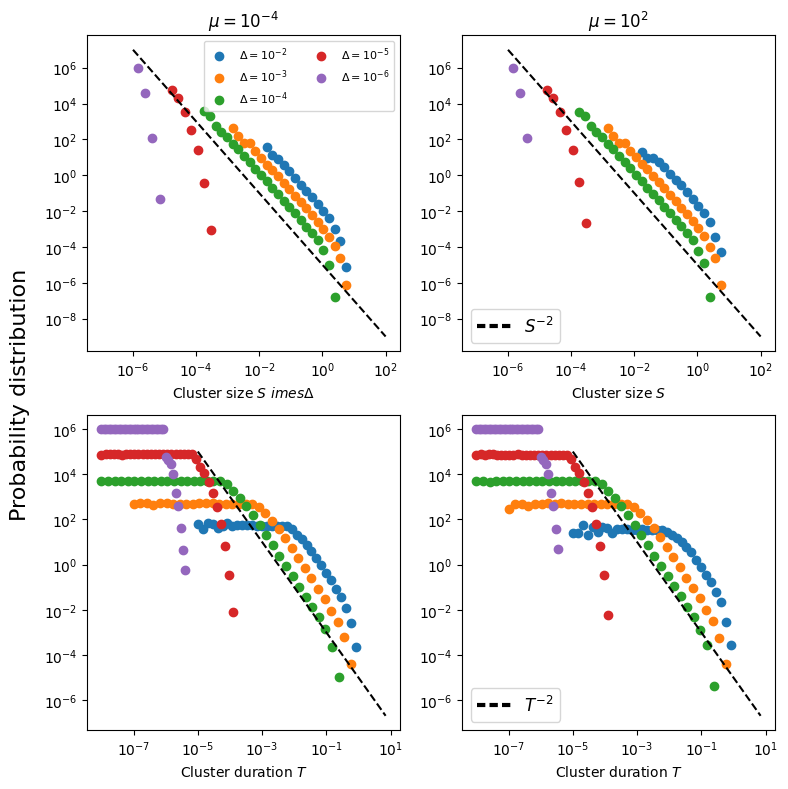

In [ ]:
shist_mu1 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu1)]
shist_mu2 = [np.histogram(s, density= True, bins=sbins[i])[0] for i, s in enumerate(clusters_sizes_mu2)]
thist_mu1 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu1)]
thist_mu2 = [np.histogram(t, density= True, bins=tbins[i])[0] for i, t in enumerate(clusters_times_mu2)]

labels = ['10^{-2}', '10^{-3}', '10^{-4}', '10^{-5}', '10^{-6}']
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

fig.axes[0].set_title('$\mu=10^{-4}$')
fig.axes[1].set_title('$\mu=10^{2}$')


for i in range(5):
    fig.axes[0].scatter(sbins[i][:-1], shist_mu1[i], label=f'$\Delta={labels[i]}$') 
    fig.axes[1].scatter(sbins[i][:-1], shist_mu2[i], label=f'$\Delta={labels[i]}$')
    fig.axes[2].scatter(tbins[i][:-1], thist_mu1[i], label=f'$\Delta={labels[i]}$')
    fig.axes[3].scatter(tbins[i][:-1], thist_mu2[i], label=f'$\Delta={labels[i]}$')

for i in range(4):
    fig.axes[i].set_xscale('log')
    fig.axes[i].set_yscale('log')

fig.supylabel('Probability distribution', fontsize=16)
fig.axes[0].set_xlabel('Cluster size $S$ $\times \Delta$')
fig.axes[1].set_xlabel('Cluster size $S$')
fig.axes[2].set_xlabel('Cluster duration $T$')
fig.axes[3].set_xlabel('Cluster duration $T$')
fig.axes[0].legend(ncol = 2, fontsize = 8, loc = 'best')

s_bins = np.logspace(-6, 2, num = 100, base = 10)
y_s = s_bins**(-2)*10**-5
y_t = tbins[0][:-1]**(-2) * 10**-5

fig.axes[0].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[1].plot(s_bins, y_s, color='black', linestyle='--')
fig.axes[2].plot(tbins[0][:-1], y_t, color='black', linestyle='--')
fig.axes[3].plot(tbins[0][:-1], y_t, color='black', linestyle='--')


fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$T^{-2}$'], loc = 'lower left', fontsize = 12)
fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=3, linestyle='--')], labels=['$S^{-2}$'], loc = 'lower left', fontsize = 12)

fig.tight_layout()
